# 1. Installing packages

In [1]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 8.7MB/s ta 0:00:01
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 2. Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import unicodedata
from nltk import WordNetLemmatizer
nltk.download('wordnet')
from nltk import PorterStemmer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# 3. Data cleaning and wrangling

In [3]:
#df = pd.read_csv("dataset_sample.csv")
df = pd.read_csv("stack_exchange_dataset.csv")
df = df[['Title','Body']]
df.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Title,Body
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us..."
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...
3,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ..."
4,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...


## a. Handling missing values

In [4]:
df.shape

(420667, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420667 entries, 0 to 420666
Data columns (total 2 columns):
Title    420556 non-null object
Body     420545 non-null object
dtypes: object(2)
memory usage: 6.4+ MB


Using the *.info()* dataframe function, we can see that there are 420,556 non-null instances out of 420,666 total instances in the dataset. Since we are dealing with a relatively large dataset and there appears to be only about a 100 missing rows, we can simply remove them. 

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420545 entries, 0 to 420666
Data columns (total 2 columns):
Title    420545 non-null object
Body     420545 non-null object
dtypes: object(2)
memory usage: 9.6+ MB


In [7]:
df.shape

(420545, 2)

## b. Figure out how many types of HTML tags exist in the *Body* column

In order to do this, we can use the *regex* functionality of dataframes to figure out all the unique cases where the pattern *<???>* is used. This is a standard HTML format where chunks of code or text is embedded inside the < and > characters. 

In [8]:
#Finding all instances where an HTML pattern is seen in the dataset
html_tags = df['Body'].str.findall(r'(</\w*>|<\w*>)')
print ("Printing first 5 rows of dataset with all HTML tags")
print (html_tags.head())
print ()

#Combining all the HTML tags in the dataset to find unique values
html_tags_all = []
try:
    for i in html_tags:
        html_tags_all.extend(i)
except:
    print (i)
    
print ()
print ('Printing a list of the first 10 HTML tags in the dataset')
print (html_tags_all[:10])

Printing first 5 rows of dataset with all HTML tags
0                               [<p>, </p>, <p>, </p>]
1                               [<p>, </p>, <p>, </p>]
2    [<p>, </p>, <pre>, <code>, </code>, </pre>, <p...
3    [<p>, </p>, <p>, </p>, <p>, </p>, <p>, </p>, <...
4    [<pre>, <code>, </code>, </pre>, <p>, </p>, <c...
Name: Body, dtype: object


Printing a list of the first 10 HTML tags in the dataset
['<p>', '</p>', '<p>', '</p>', '<p>', '</p>', '<p>', '</p>', '<p>', '</p>']


Now that we have extracted all HTML tags in the dataset and combined them into one list, we need to verify if we were actually able to capture all the tags. To do this, we can compare the total number of tags in the initial dataset to the combined list. 

In [9]:
print ("Number of HTML tags in the first regex dataset")
print (sum(html_tags.apply(len)))
print ()

print ("Number of HTML tags in the combined list")
print (len(html_tags_all))

Number of HTML tags in the first regex dataset
6231982

Number of HTML tags in the combined list
6231982


Having verified that our parsing works correctly, we can now pick out all the unique HTML tags. 

In [10]:
#Printing unique HTML tags
unique_html = list(set(html_tags_all))
print ("Unique HTML tags")
print (unique_html)

Unique HTML tags
['<Pre>', '<dt>', '</em>', '</p>', '<H3>', '<Br>', '<sup>', '<STRIKE>', '<H1>', '</STRIKE>', '<P>', '<Blockquote>', '<Kbd>', '</pre>', '</H2>', '</Kbd>', '</sup>', '</kbd>', '</CODE>', '</BlockQuote>', '<strike>', '</li>', '<b>', '</Code>', '<SUB>', '</dt>', '<h3>', '</strike>', '<i>', '<br>', '</Pre>', '</h2>', '<KBD>', '<bR>', '</ul>', '</P>', '</PRE>', '</code>', '</sub>', '<kbD>', '</H1>', '</codE>', '<em>', '</b>', '</del>', '</Blockquote>', '</h1>', '<H2>', '<LI>', '</s>', '<sub>', '<li>', '<oL>', '<hr>', '<OL>', '<kbd>', '<blockquote>', '</KBD>', '<B>', '</A>', '</I>', '<dl>', '</B>', '<pre>', '</a>', '</OL>', '<CODE>', '</LI>', '<Code>', '<Ul>', '</strong>', '<s>', '<HR>', '<h1>', '<ul>', '<BlockQuote>', '<ol>', '</i>', '</h3>', '<h2>', '<PRE>', '</blockquote>', '<del>', '</ol>', '<BR>', '</SUB>', '<p>', '<I>', '<code>', '<strong>', '</dl>']


In [11]:
len(unique_html)

91

Using the unique HTML tags, we can find the frequency of each tag in the dataset.

In [12]:
#Finding the frequencies of each HTML tag and displaying the top 25
html_tags_total = []

for i in unique_html:
    html_tags_total.append(sum(df['Body'].str.findall(r'('+i+')').apply(len)))

df_html = pd.DataFrame()
df_html['Tag'] = unique_html
df_html['Count'] = html_tags_total
df_html['Tag'] = df_html['Tag'].str.strip('<,>')
df_html = df_html.sort_values('Count',ascending=False)

In [13]:
df_html

,Tag,Count
86,p,1700926
3,/p,1700316
88,code,642314
37,/code,642302
13,/pre,382222
63,pre,379973
51,li,105371
21,/li,105121
70,/strong,100053
89,strong,100053


The frequency of each HTML tag is shown in the table above in descending order. From this data, we notice that the most frequently occurring tags have a complimentary tag with a forward slash. The forward slash indicates the end of the text for the respective tag. For example the text in a *p* tag ends with a */p*. Hence every tag has the same frequency as that of it's forward slash compliment. So the frequency of *p* is the same as that for */p*.

However, it seems like there could be cases where a tag could have a different frequency than it's compliment. For example, **Code** has 3 occurrences while **/Code** has 2 occurrences. 

Text(0, 0.5, 'Count')

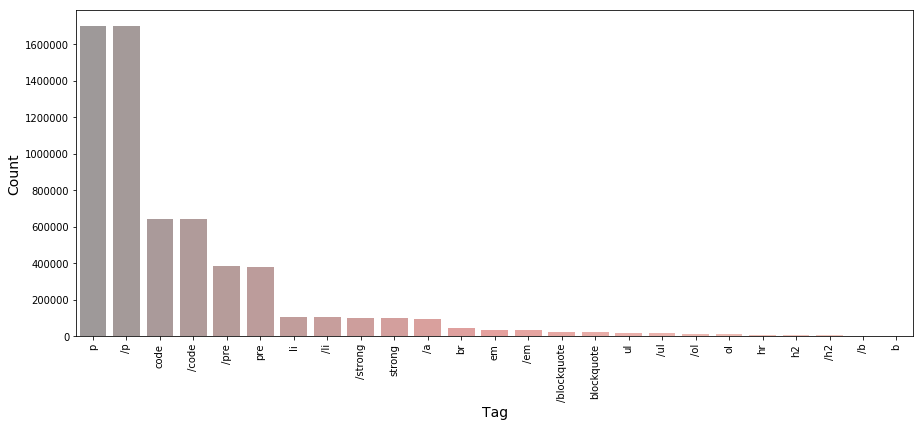

In [14]:
#Plotting frequency of tags in the dataset
plt.figure(figsize=(15,6))
sns.barplot(x='Tag',y='Count',data=df_html.iloc[:25,:],alpha=0.5,palette='Reds_d')
plt.xticks(rotation=90)
plt.xlabel('Tag',size=14)
plt.ylabel('Count',size=14)

Above, we can clearly see the highest occurring tags (top 25). 

One thing to note would be that there could be more than one type of tag in an instance. To somewhat visualize the occurrence of these tags in each instance, we can plot the distribution for each tag stacked on top of another as done below. 

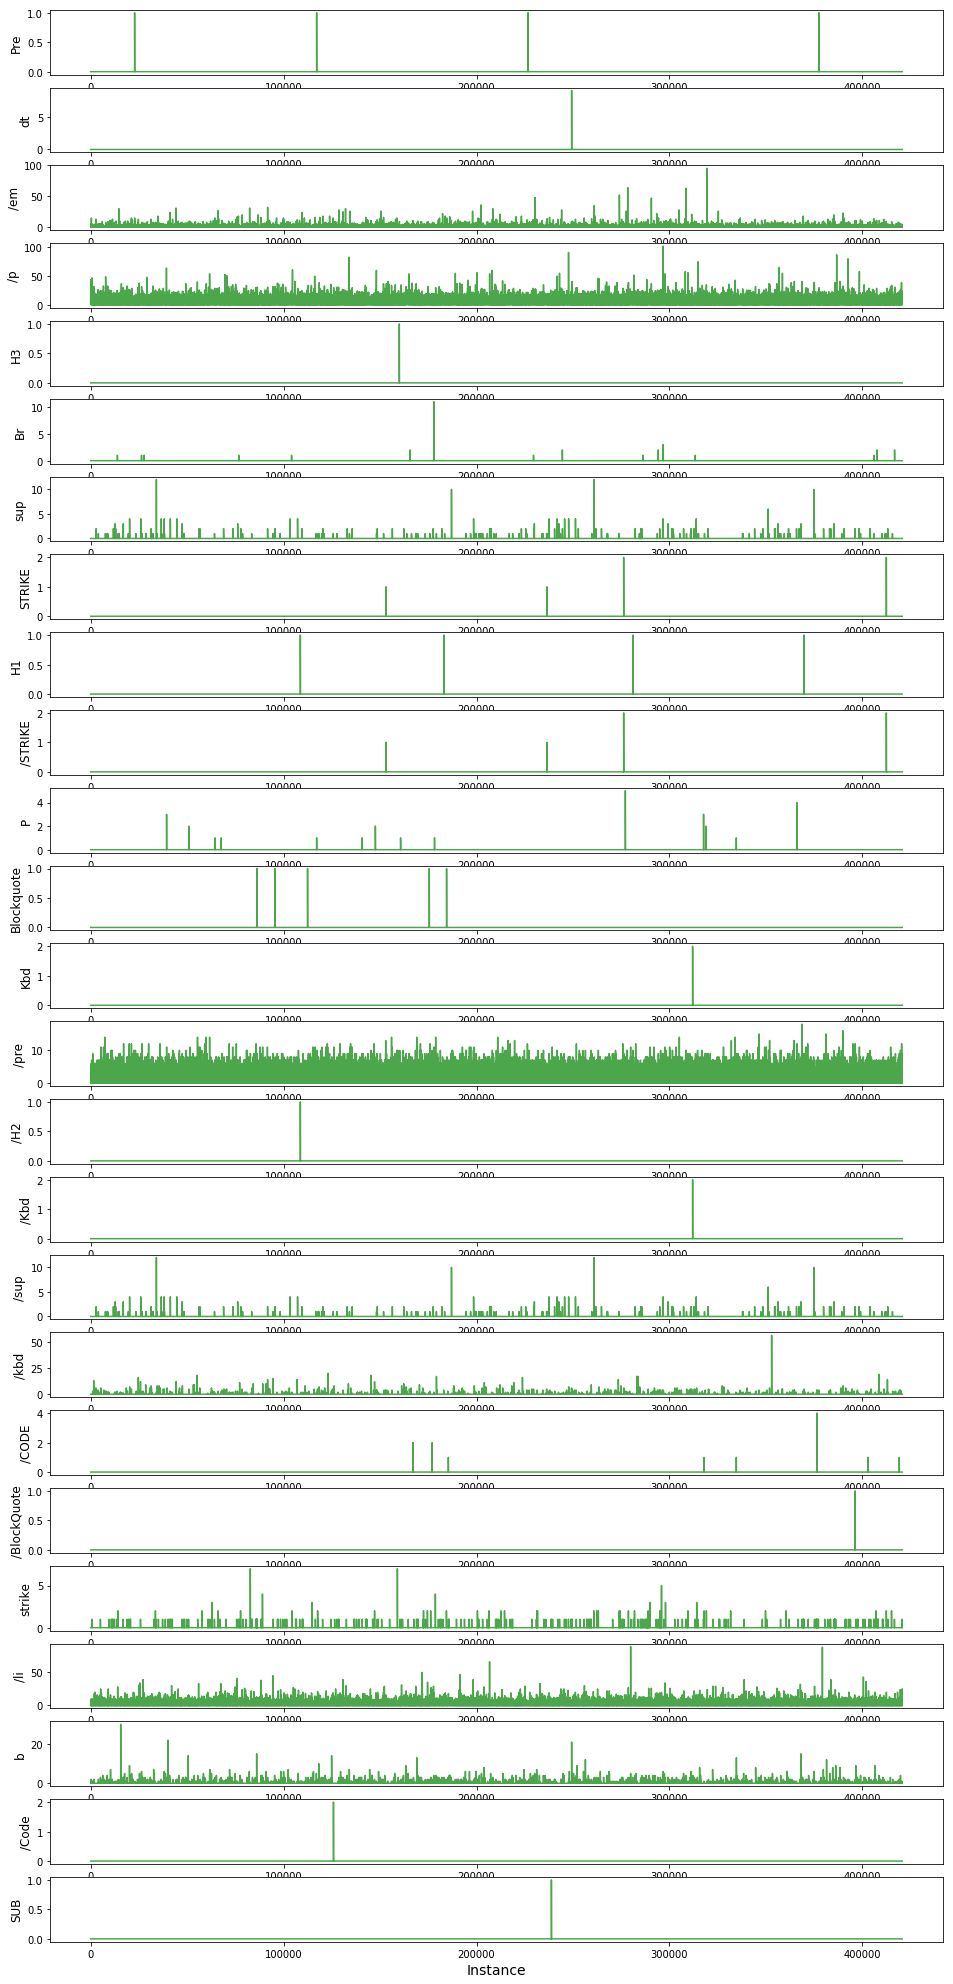

In [15]:
#Printing frequency of each tag in the dataset as separate plots stacked on top of one another
#to show where different tags overlap
plt.figure(figsize=(16,130))

for i,j in enumerate(unique_html[:25]):
    plt.subplot(len(unique_html),1,i+1)
    plt.plot(df['Body'].str.findall(r'('+j+')').apply(len),alpha=0.7,c='green')
    plt.xlabel('Instance',size=14)
    plt.ylabel(df_html['Tag'][i],size=12)

The visualization above shows the frequency of each tag across each instance. However, since each tag also contains a complimentary tag with a slash, we can simply plot just the ones without the slash, as shown below. 

In [16]:
#Selecting tags without the forward slash
slash_bool_mask = df_html['Tag'].str.contains('/')
#Flipping the boolean mask that captured instances containing '/'
df_html_no_slash = df_html[~slash_bool_mask]
df_html_no_slash.head()

,Tag,Count
86,p,1700926
88,code,642314
63,pre,379973
51,li,105371
89,strong,100053


In [17]:
df_html_no_slash.shape

(49, 2)

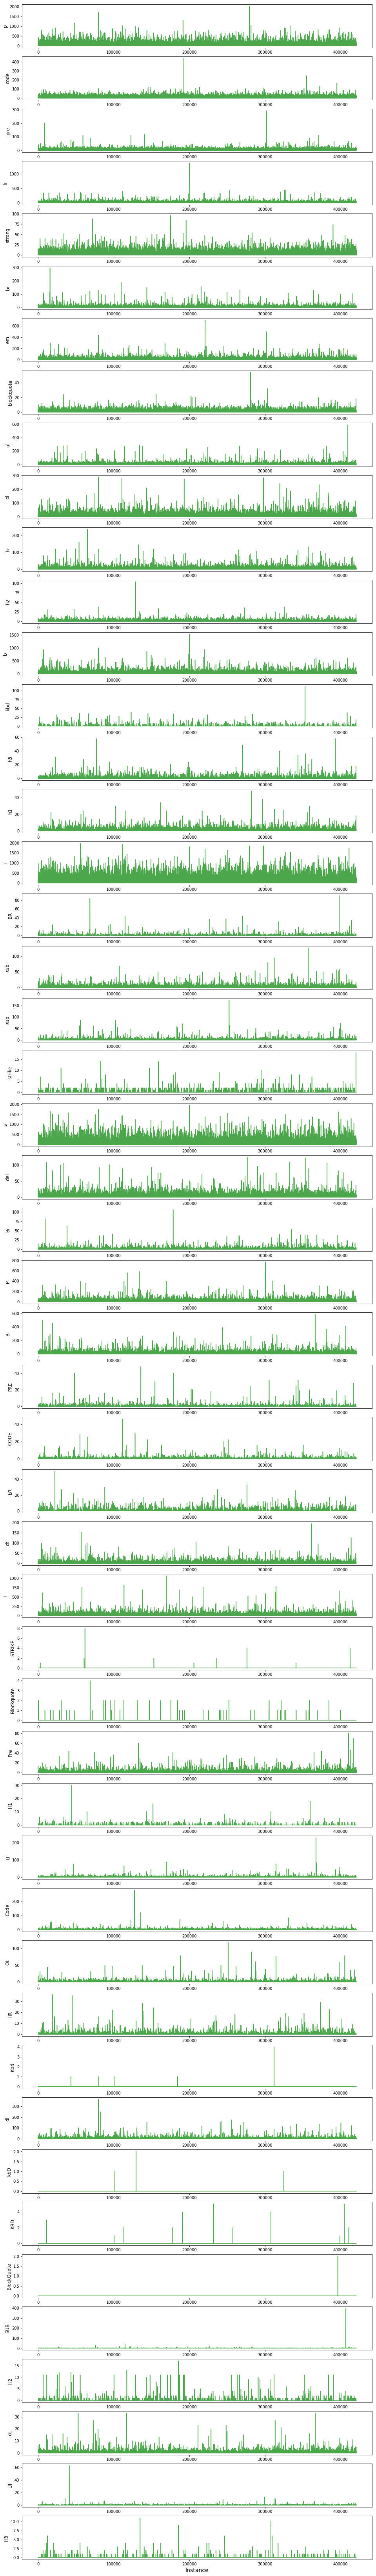

In [18]:
#Printing frequency of each tag in the dataset as separate plots stacked on top of one another
#to show where different tags overlap
plt.figure(figsize=(16,120))

for i,j in enumerate(df_html_no_slash['Tag']):
    plt.subplot(len(df_html_no_slash['Tag']),1,i+1)
    plt.plot(df['Body'].str.findall(r'('+j+')').apply(len),alpha=0.7,c='green')
    #plt.scatter(range(len(df['Body'].str.findall(r'('+j+')').apply(len))),df['Body'].str.findall(r'('+j+')').apply(len),alpha=0.7,c='green')
    plt.xlabel('Instance',size=14)
    plt.ylabel(df_html_no_slash['Tag'].iloc[i],size=12)
    #plt.ylim(0,200)

From the plots above, if we look at the b tag for instance, it has a few high frequencies between instances 300 and 400. Otherwise, it is mostly below 50. Tags such as p has frequencies that are higher indicating that it's one of the more predominant tags in the dataset. 

## c. Figure out how many types of HTML tags exist in the *Title* column

For this part, we can directly use the same pieces of code we used above for the *Body* column. 

Text(0, 0.5, 'Count')

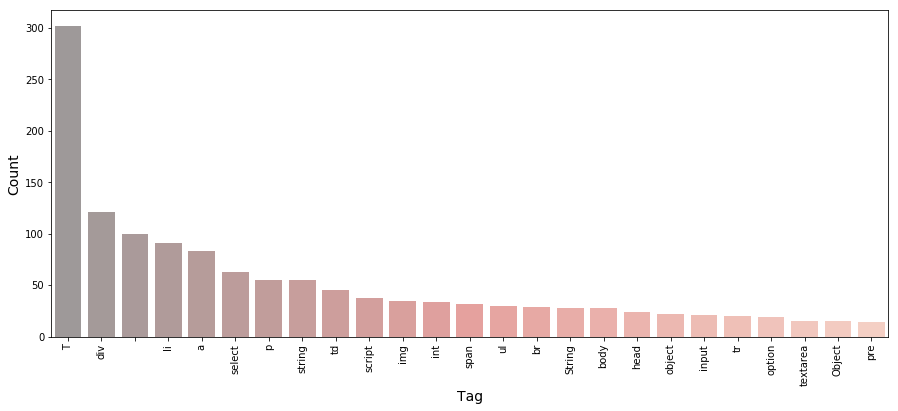

In [19]:
#Finding all instances where an HTML pattern is seen in the dataset
html_tags = df['Title'].str.findall(r'(</\w*>|<\w*>)')

#Combining all the HTML tags in the dataset to find unique values
html_tags_all = []
try:
    for i in html_tags:
        html_tags_all.extend(i)
except:
    print (i)
    
#Printing unique HTML tags
unique_html = list(set(html_tags_all))

#Finding the frequencies of each HTML tag and displaying the top 25
html_tags_total = []

for i in unique_html:
    html_tags_total.append(sum(df['Title'].str.findall(r'('+i+')').apply(len)))

df_html = pd.DataFrame()
df_html['Tag'] = unique_html
df_html['Count'] = html_tags_total
df_html['Tag'] = df_html['Tag'].str.strip('<,>')
df_html = df_html.sort_values('Count',ascending=False)

#Plotting frequency of tags in the dataset
plt.figure(figsize=(15,6))
sns.barplot(x='Tag',y='Count',data=df_html.iloc[:25,:],alpha=0.5,palette='Reds_d')
plt.xticks(rotation=90)
plt.xlabel('Tag',size=14)
plt.ylabel('Count',size=14)

The distribution of tag frequencies for **Title** are far more uneven than the **Body** case. There are no complimentary tags and some of these words are not even actual HTML tags such as **script, img, object**. Most of these words could have simply had **<>** and **<\>** around them because the user wanted to emphasize them. 

Considering that, most of these words don't seem to be keywords either. Therefore, we can get rid of these words completely. 

## d. Removing tags from *Title* and *Body* to just keep the text for *topic modeling*

In [20]:
#Removing tags from the Body column
df_body_text = df.copy()
df_body_text['Body'] = df_body_text['Body'].str.replace(r'(</\w*>|<\w*>)','')
df_body_text['Body'].head()

0    I'd like to check if an uploaded file is an im...
1    In my favorite editor (vim), I regularly use c...
2    I am import matlab file and construct a data f...
3    This is probably very simple, but I simply can...
4    function modify(.......)\n{\n  $mcontact = fil...
Name: Body, dtype: object

In [21]:
#Checking to see if the removal worked
sum(df_body_text['Body'].str.findall(r'(</\w*>|<\w*>)').apply(len))

0

Since the sum of the lengths of each row containing any tags is 0 for the new dataframe, we can be convinced that the tags were removed successfully. 

Let's take a look at the text of the first row. 

In [22]:
df_body_text['Body'][0]

"I'd like to check if an uploaded file is an image file (e.g png, jpg, jpeg, gif, bmp) or another file. The problem is that I'm using Uploadify to upload the files, which changes the mime type and gives a 'text/octal' or something as the mime type, no matter which file type you upload.\n\nIs there a way to check if the uploaded file is an image apart from checking the file extension using PHP?\n"

Now let's take a look at the original version of this text with the tags. 

In [23]:
df['Body'][0]

"<p>I'd like to check if an uploaded file is an image file (e.g png, jpg, jpeg, gif, bmp) or another file. The problem is that I'm using Uploadify to upload the files, which changes the mime type and gives a 'text/octal' or something as the mime type, no matter which file type you upload.</p>\n\n<p>Is there a way to check if the uploaded file is an image apart from checking the file extension using PHP?</p>\n"

We now look at the title column.

In [24]:
#Removing tags from the Body column
df_body_text['Title'] = df_body_text['Title'].str.replace(r'(</\w*>|<\w*>)','')
df_body_text['Title'].head()

0    How to check if an uploaded file is an image w...
1    How can I prevent firefox from closing when I ...
2             R Error Invalid type (list) for variable
3        How do I replace special characters in a URL?
4                 How to modify whois contact details?
Name: Title, dtype: object

In [25]:
#Checking to see if the removal worked
sum(df_body_text['Title'].str.findall(r'(</\w*>|<\w*>)').apply(len))

18

It looks like there are still 18 documents for the title column that have the **<>** notation. Let's a closer look at these instances.

In [26]:
df_body_text[df_body_text['Title'].str.findall(r'(</\w*>|<\w*>)').apply(len)!=0]['Title']

10522                ObjectResult<Nullable> to IEnumerable?
29274     How do I get CXF to understand a Map<String, <...
55249     how to use linq on a list to generate a list<l...
76411                           Use case diagrams use of <>
77427     How do I combine two lists to a List<KeyValueP...
132807                             Xcode template <> format
135779                        Sort List<List> by list value
190874             Sorting an list of type `List<Iterable>`
262057    multiple threads providing data to List<List> ...
269508    Instantiating IEnumerable<IEnumerable> with an...
320776                  Find all permutations of List<List>
345501     Binding List<Collection> To grid view in asp.net
366661            vector<vector> vs. vector<vector*> in c++
366887                        How to type "<>" in ttfamily?
367471             int [] [] convert --to--> Vector<Vector>
398128    How to format List<List> as a table in JSON file?
398533    Found unexpected  inside <<<>>

Let's try our tag removal algorithm once again. 

In [27]:
df_body_text['Title'] = df_body_text['Title'].str.replace(r'(</\w*>|<\w*>)','')
sum(df_body_text['Title'].str.findall(r'(</\w*>|<\w*>)').apply(len))

1

Interestingly, most of the remaining tags were removed on a second iteration of the removal process. But there is 1 still remaining. Let's take a look at this one. 

In [28]:
df_body_text[df_body_text['Title'].str.findall(r'(</\w*>|<\w*>)').apply(len)!=0]['Title'].values

array(['Found unexpected  inside <<>>. This is not a valid child element'],
      dtype=object)

We have a very unique notation here with **<<>>**. This can be handled later once we get to the stopword and symbol removal process. We can add this notation to the set of symbols to be removed. 

## e. Removing \n (newline) characters from the text

In [29]:
#Searching for newline characters in the Body
df_body_text['Body'].str.findall(r'(\n)').apply(len).head()

0      3
1      3
2    201
3     13
4     20
Name: Body, dtype: int64

In [30]:
#Total newline characters in the Body
print ("Number of newline characters in the Title column: ",sum(df_body_text['Body'].str.findall(r'(\n)').apply(len)))

Number of newline characters in the Title column:  9682425


In [31]:
#Searching for newline characters in the Title
df_body_text['Title'].str.findall(r'(\n)').apply(len).head()

0    0
1    0
2    0
3    0
4    0
Name: Title, dtype: int64

In [32]:
#Total newline characters in the Title
print ("Number of newline characters in the Title column: ",sum(df_body_text['Title'].str.findall(r'(\n)').apply(len)))

Number of newline characters in the Title column:  0


It seems like there are **12122 newline characters** in the Body column but none in the Title column. Hence we only need to handle these characters for the body. 

Text(0, 0.5, 'Frequency')

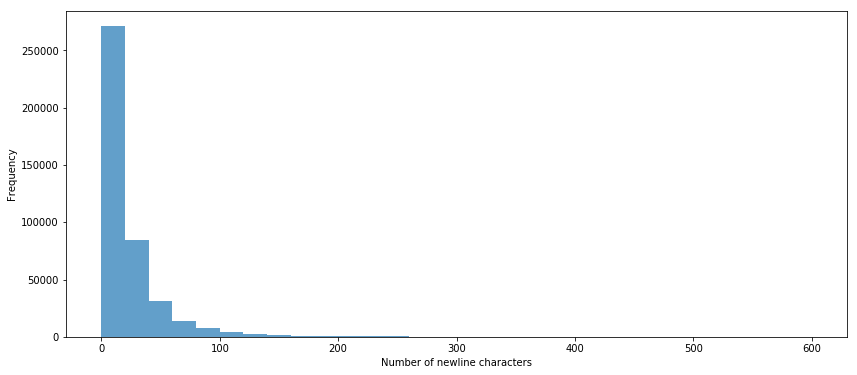

In [33]:
#Plotting newline character frequencies across instances
plt.figure(figsize=(14,6))
plt.hist(df_body_text['Body'].str.findall(r'(\n)').apply(len),range=(0,600),bins=30,alpha=0.7)
plt.xlabel('Number of newline characters')
plt.ylabel('Frequency')

The above plot shows that most instances contain 0 newline characters. More than 250,000 instances contain less than 20 newlines. About 80,000 instances contain between 20 to 40 newlines. The distribution tapers off quickly after that showing a right skewed plot. 

Text(0, 0.5, 'Frequency')

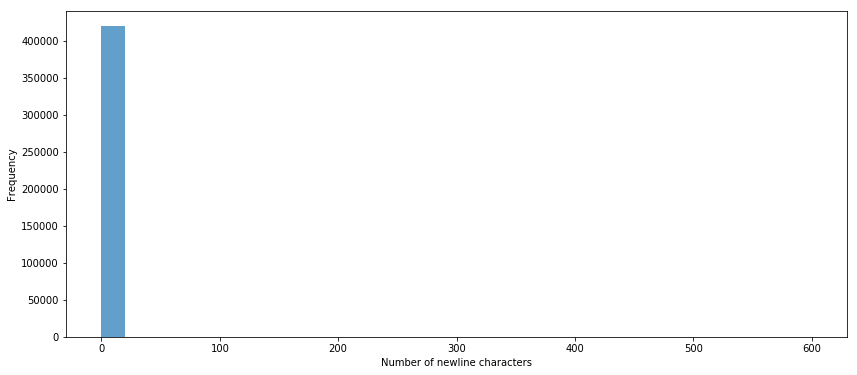

In [34]:
#Plotting newline character frequencies across instances
plt.figure(figsize=(14,6))
plt.hist(df_body_text['Title'].str.findall(r'(\n)').apply(len),range=(0,600),bins=30,alpha=0.7)
plt.xlabel('Number of newline characters')
plt.ylabel('Frequency')

As expected, none of the Title instances contain any newline characters. 

In [35]:
#Removing newline characters
df_body_text['Body'] = df_body_text['Body'].str.replace(r'(\n)','')
df_body_text['Body'].head()

0    I'd like to check if an uploaded file is an im...
1    In my favorite editor (vim), I regularly use c...
2    I am import matlab file and construct a data f...
3    This is probably very simple, but I simply can...
4    function modify(.......){  $mcontact = file_ge...
Name: Body, dtype: object

In [36]:
df_body_text['Body'][0]

"I'd like to check if an uploaded file is an image file (e.g png, jpg, jpeg, gif, bmp) or another file. The problem is that I'm using Uploadify to upload the files, which changes the mime type and gives a 'text/octal' or something as the mime type, no matter which file type you upload.Is there a way to check if the uploaded file is an image apart from checking the file extension using PHP?"

We have now removed both tags and newline characters from the body of the text. Let's take a look at some more rows to verify. 

In [37]:
df_body_text['Body'][1]

'In my favorite editor (vim), I regularly use ctrl-w to execute a certain action. Now, it quite often happens to me that firefox is the active window (on windows) while I still look at vim (thinking vim is the active window) and press ctrl-w which closes firefox. This is not what I want. Is there a way to stop ctrl-w from closing firefox?Rene'

In [38]:
df_body_text['Body'][2]

'I am import matlab file and construct a data frame, matlab file contains two columns with and each row maintain a cell that has a matrix, I construct a dataframe to run random forest. But I am getting following error. Error in model.frame.default(formula = expert_data_frame$t_labels ~ .,  :   invalid type (list) for variable \'expert_data_frame$t_labels\'Here is the code how I import the matlab file and construct the dataframe:all_exp_traintest &lt;- readMat(all_exp_filepath);len = length(all_exp_traintest$exp.traintest)/2;    for (i in 1:len) {      expert_train_df &lt;- data.frame(all_exp_traintest$exp.traintest[i]);      labels = data.frame(all_exp_traintest$exp.traintest[i+302]);      names(labels)[1] &lt;- "t_labels";      expert_train_df$t_labels &lt;- labels;      expert_data_frame &lt;- data.frame(expert_train_df);      rf_model = randomForest(expert_data_frame$t_labels ~., data=expert_data_frame, importance=TRUE, do.trace=100);    }Structure of the Matlab input file[56x12 dou

In the above three examples, the first 2 instances seem to have normal text whereas the third instance seems to contain a lot of data and numbers. There also appears to be some code in the text. Such instances will be harder to handle than others but we will deal with these complexities later. 

## e. Exporting dataset for *word tokenization* and further processing

In [41]:
df_body_text.to_csv('stack_exchange_dataset_no_nulls_no_htmltags_no_newlines.csv')